# Seaborn: 
Questo notebook contiene esempi, commenti e grafici basati sul bel video di Derek Banas:

https://www.youtube.com/watch?v=6GUZXDef2U0&ab_channel=DerekBanas

Qualunque errore e' dovuto a me e non da imputare a Derek Banas.
Ho aggiunto anche pensieri e esempi che mi servivano.

In alcuni casi i comandi indicati da Banas mi davano problemi, 
probabilmente per le versioni di Python/Matplotlib/Seaborn. 
Ho cercato di farli girare con dei piccoli cambiamenti. La mia versione e' basata su una Anaconda aggiornata 
al Novembre 2020.

Alle volte faccio dei paragoni con Gnuplot, dato che e' il mio sistema di visualizzazione di base...

E' capitato che facessi degli errori banali, ho lasciato le note sulle soluzioni perche' possono essere utili.


`Introduzione`:

Seaborn e' una libreria che lavora su Matplotlib e Pandas.
Visto che un DataFrame di Pandas ha molte colonne, spesso sara' necessario fare dei grafici
multipli che contengano informazioni di tutte le coppie di colonne. In questo senso 
si puo' vedere `Seaborn` come una serie di script che forniscono delle combinazioni
di comandi che rendono veloce e semplice le visualizzazioni multiple (per progetti di data science).



Alternativamente a Matplotlib esiste un'altra libreria chiamata **bokeh** (che esplorero' in seguito)

**Trucco utilissimo** (che non conoscevo/ricordavo) di Jupyter notebook
- cliccki su una cella
- clicchi su una funzione
- premi shift-tab: ti fa vedere tutti gli argomenti che possono essere passati a quella funzione


Quando mi riferisco alle **funzioni** di Seaborn, non parlo di metodi associati ai DataFrame. La sola differenza e' che non si applicano tramite la dot "notation" dei metodi, ma che il DataFrame (o sue parti) sono passate come argomenti delle funzioni stesse. Inoltre ci possono essere altri `argomenti` utili, come per esempio: 
- hue       (assegna colori diversi a valori diversi, p.es. maschi e femmine)   
- palette   (sono combinazioni di colori, in cui viene definita una topologia di colori, per esemppio il successivo a questo rosso e' quest'altro rosso...)
- palettes  (cerca la lista: maplotlib colormaps https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html )
- styling   (per cambiare la dimensione delle label..)
- set_style (cambia lo sfondo)    **non funge** (forse perche' faccio girare la cella dopo averne fatta girare un'altra che ha lasciato qualcosa in memoria)
- font_scale (grandezza delle label)
- spine     (gli assi, laterali e verticali) ATTENTO: va messo **sotto** il comando sns.joinplot
- figsize   (indica l'aspect ratio del rettangolo, base e poi altezza). ATTENTO, in jupyter puoi chiedere che matplotlib sia inline, questo fa si' che le figure siano dei png sul notebook, e si puo' definire un dpi. Questo ultimo comando "fissa" la dimensione visibile della figura! 
- spine sono gli assi!
- legend   (la legenda)
- jitter   (per fare uno spredout dei punti in alcuni tipi di plot)
- side by side ( per mettere 2 figure di seaborn una da parte all'altra cerca: **subplots**)
- palettes  (cerca la lista: maplotlib colormaps https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html )
- pivot tables (per fare le matrici, definisci le righe e le colonne. Questo seleziona dei valori. Tipicamente per questi valori esistono varie righe del DataFrame, da cui posso estrarre un grafico per ognuna delle righe e colonne della pivot table.) In prarica una pivot table fa un prodotto cartesiano tra tutti gli elementi delle righe e delle colonne.
- **Subplot** figure una di lato all'altra,o meglio all'interno di una "griglia" dove ci possono essere tanti grafici.


Attento devi mettere il seguente con seaborn, che non c'e' nel video di Banas:
- ax=axes[0] # per il primo 
- ax=axes[1] # per il secondo oggetto.

Se non li metti il sistema non fa vedere la prima figura ma disegna un plot vuoto e fa vedere da parte l'ultimo plot
disegnato. Ho trovato l'esempio con i pokemon (sebbene la pagina sia poco leggibile): https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8 




**TRUCCO**
ci sono vari magic command di Matplotlib oltre al solito `inline`:

%matplotlib inline - Figures are shown as static png images (optionally svg if configured)

%matplotlib notebook or %matplotlib nbagg - Interactive Figures inside the notebook

%matplotlib widgets - - Interactive Figures inside the notebook (requires jupyter-matplotlib to be installed)

%matplotlib tk or


`Nota tecnica`:

Ho notato che una TOC poteva risultare utile, per questo ho installato `jupyter-navbar`.
Ho semplicemente scaricato lo zip da https://github.com/shoval/jupyter-navbar
e (dopo avere decompresso) ho fatto girare da Babun con python2.7 il file setup.py
(questo perche' lo sto facendo girare in Windows 10).
In questo modo appare la barra con l'indice. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set()

%matplotlib inline
#%matplotlib notebook
#%matplotlib tk
#%matplotlib widgets

# questi sotto non so ancora cosa facciano
%reload_ext autoreload 
%autoreload 2

In [2]:
#cs_df = pd.read_csv('ComputerSales.csv')  # dovrei trovarlo

## Dataset di Seaborn
posso sapere la lista di questi dataset e anche caricarli velocemente con il metodo `load_dataset`

In [3]:
print (sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


In [4]:
crash_df = sns.load_dataset('car_crashes')
print(crash_df.shape)
print(crash_df.head(3))

(51, 8)
   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  


# Distribution Plots

## Distribution Plot

`sns.distplot(miaSerie)`: questa funzione, in pratica, se applicata ad una `Series` di Pandas produce automaticamente un istogramma.

Occhio che il comando qui sotto e' deprecato, e verra rimosso in futuro.
Non e' chiaro perche', ma nelle note del "warning" di python indicano di usare una funzione con lo stesso nome:

**distplot** ma che e' "a figure-level function",

oppure:

**histplot**

Questa funzione in ogni modo fa un **istogramma** di una colonna (Series) di un dataframe di Pandas.

Inoltre per default fa anche un **kernel density estimation** (KDE), possiamo spegnerlo con kde=False

**bins** e' il numero di bin dell'immagine, non la loro larghezza (ovviamente visto che ha una s...)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='not_distracted'>

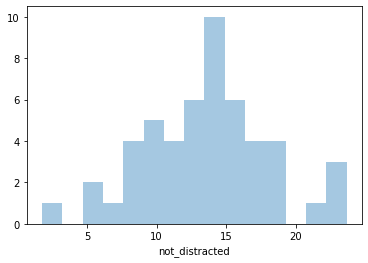

In [5]:
sns.distplot(crash_df['not_distracted'], kde=False, bins=15)

## Joint Plots
La funzione: `sns.jointplot` costruisce uno scatterplot con "aggiunte".

- viene fatto per paragonare 2 distribuzioni diverse (che saranno 2 colonne di un DataFrame).

- In pratica fa un scatter plot, e sopra e sotto mette anche gli istogrammi relativi alle colonne.

- inolte si puo' aggiungere al volo una *regressione lineare* con il comando `kind='reg'` nello scatterplot e i kernel sopra gli istogrammi.

- il comando kind definisce lo stile di visualizzazione.

- vanno passate delle x e delle y in forma di Series che costituiranno le coordinate dei punti dello scatterplot. Ovviamente il numero di oggetti delle x e delle y deve essere lo stesso, altrimenti per un punto ci sarebbe solo una coordinata ma non la seconda...

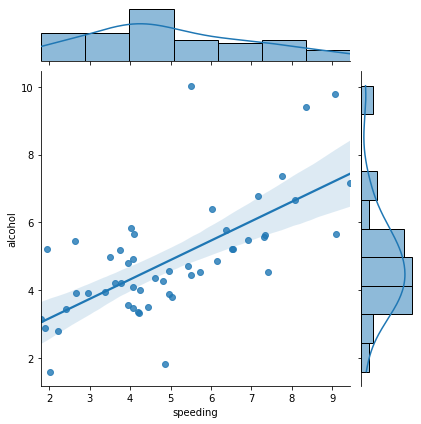

In [6]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind ='reg' );

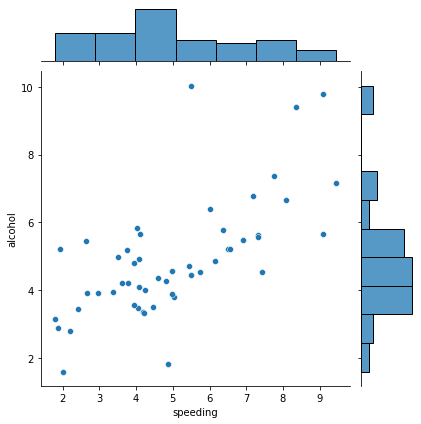

In [7]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df );  # ho tolto la curva con il kernel  estimation e la regressione

**Attenzione** che il grafo nel video non ha solo le isoipse ma anche un sistema di colorazione 
 che in qui sotto non appare!

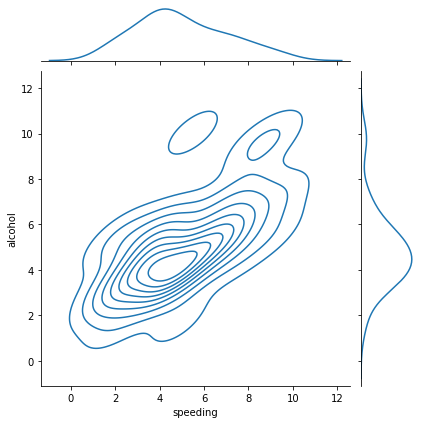

In [8]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind= 'kde' );

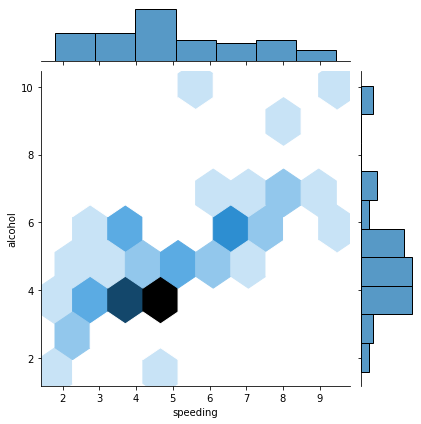

In [9]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind= 'hex' );

## KDE plot

La funzione Kdeplot costruisce una sorta di interpolazione dei dati di una series.

nota che nel grafico **sotto** non appare la `legenda`, mentre nel video c'e' di default!

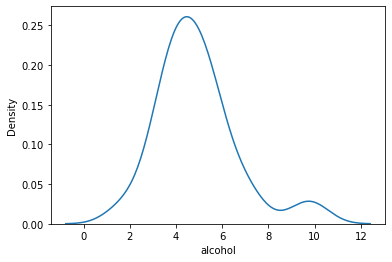

In [10]:
sns.kdeplot(crash_df['alcohol']);

## Pair Plot
Fa vedere la relazione tra tutte le coppi di colonne contenenti **valori numerici** dell'intero DataFrame.

- Esclude i **valori categorici**

- Occhio che e' lento!

- Anche in questo caso il comando `kind=...` definisce come viene visualizzato lo scatterplot. Nell'esempio sotto solo le isoipse.

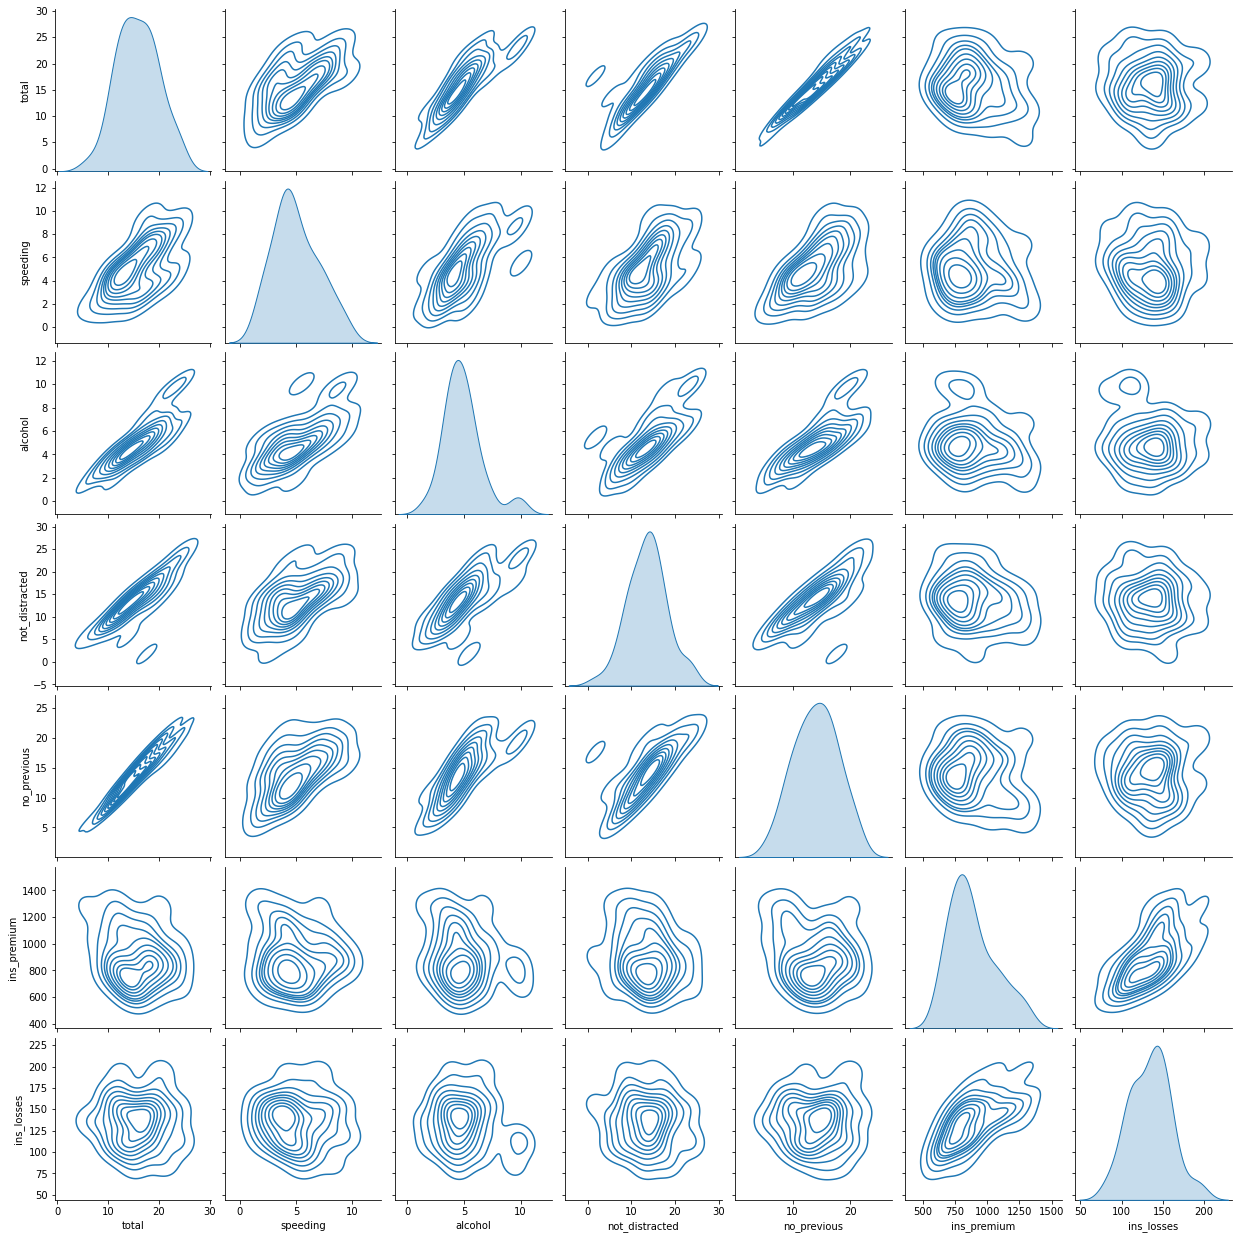

In [11]:
sns.pairplot(crash_df, kind = 'kde');  # nel video fa anche i colori e non solo le linee di livello

## Pairplot
### Hue
**hue** assegna un colore diverso a tutti i valori della colonna indicata. Per esmepio in questo caso **hue='sex'**,
quindi i punti associati a Male e Female sono colorati in modo diverso.

In pratica lui va a prendere i dati, li divide per sesso, poi li disegna automaticamente sullo stesso grafico ma con colori diversi!

Nota: si puo' usare anche con variabili categoriche, non solo le variabili numeriche (anzi penso
che possa avere dei problemi se le variabili numeriche sono float...)


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3


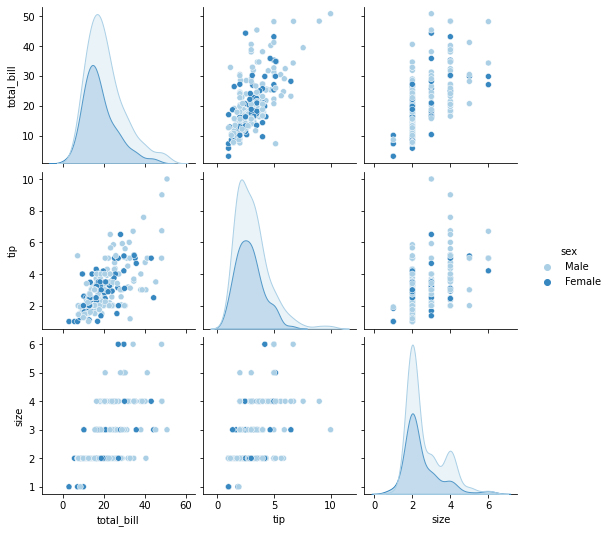

In [12]:
tips_df = sns.load_dataset('tips')
print(tips_df.head(3))
sns.pairplot(tips_df, hue='sex', palette='Blues');            # occhio che qui c'e' il sesso del pagante non del ricevente...

## Rug plot
Questo tipo di grafico fa vedere delle lineette per ogni punto. 
In pratica fa un unfolding di un istogramma.

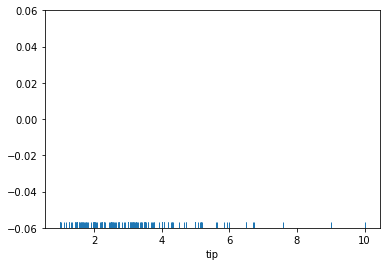

In [13]:
sns.rugplot(tips_df['tip']);

# Styling
serve per modificare l'aspetto delle figure

Problema, se cambio i parametri di figsize, mi restituisce un "Figure size 576x864 with 0 Axes", e i valori contenuti sono coerenti coi parametri che ho dato... ma il grafico non viene modificato! Forse il problema e' legato all'`inline` lanciato all'inizio mentre in un eventuale salvataggio a file otterrei dei risultati differenti?   

- **spine** e' il termine tecnico associato agli assi. Se per esempio non voglio che uno degli assi appaia nel grafico posso usare la funzione **despine**. Attenzione che va messo sotto il comando del disegno **joinplot** altrimenti non ha effetto!
- **set_context** modifica i parametri in modo che la dimensione dei font e del grafico siano proporzionati in base al **contesto**. Per esempio se faccio un poster ho bisogno di label grandi...

- **set_style** sono le combinazioni di colori dello `sfondo`


<Figure size 576x360 with 0 Axes>

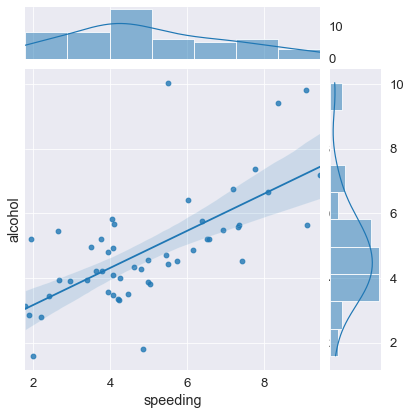

In [14]:
#sns.set_style ('white')      
sns.set_style ('darkgrid')
#sns.set_style ('whitegrid')
#sns.set_style ('ticks')

plt.figure(figsize=(8,5))    # non funge, devo capire perche'!

sns.set_context('paper', font_scale=1.5)
#sns.set_context('talk', font_scale=1.5)    # ingrandisce tutto
#sns.set_context('poster', font_scale=1.5)

sns.jointplot(x='speeding', y='alcohol', data= crash_df, kind='reg');

sns.despine(left=True, right=False, top=True, bottom=False)    # Occhio va messo SOTTO joinplot altrimenti non fa nulla  

# Categorical Plotting

## Bar Plots
`barplot()`
- di default fa vedere la mean
- La barra nera fa vedre la varianza
- devo passare cosa ci sia sulle x e sulle y  (e il dataframe da cui sono prese)

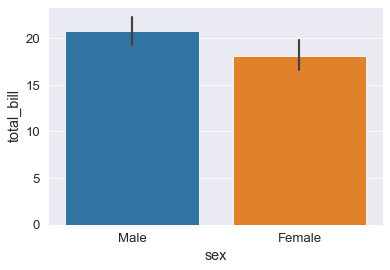

In [15]:
sns.barplot(x='sex', y='total_bill', data=tips_df);

Possiamo usare funzioni diverse per stimare i valori categorici, per esempio tutti quelli
in numpy, come la **mediana**, o la **moda** (non mi e' riuscito)!

- Attento se fai 2 barplot, li sovrappone e non si capisce nulla
- Si possono usare delle funzioni custom fatte da noi, suppongo che di base si debba lavorare con un oggetto di tipo Series di Pandas

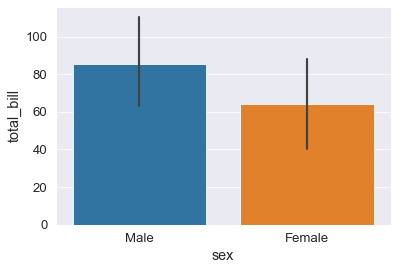

In [16]:
#sns.barplot(x='sex', y='total_bill', data=tips_df , estimator=np.median);   # mediana
#sns.barplot(x='sex', y='total_bill', data=tips_df , estimator=np.std);       # deviazione standard
#sns.barplot(x='sex', y='total_bill', data=tips_df , estimator=np.var);      # varianza
sns.barplot(x='sex', y='total_bill', data=tips_df , estimator=np.cov);      # covarianza

#from scipy.stats import mode  # non sono riuscito a fargli usare la moda
#sns.barplot(x='sex', y='total_bill', data=tips_df , estimator=mode);

## Count Plot
`countplot`

e' come un barplot ma l'estimatore conta solo il numero di occorrenze, per questo non ha bisogno della y (e' automaticamente il numero di occorrenze)

<AxesSubplot:xlabel='sex', ylabel='count'>

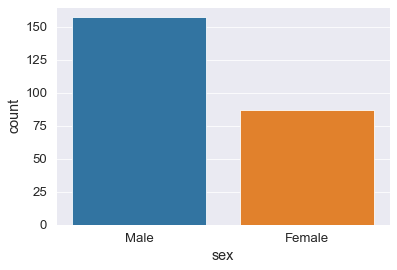

In [17]:
sns.countplot(x='sex', data=tips_df)

## Box Plot

`boxplot()`

fa vedere il grafico a baffi con i quartili dei dati.

- la linea nera e' la mean
- la scatola si estende di una **deviazione standard** (siamo sicuri? calcola la deviazione standard destra e sinistra? Di solito (wikipedia) la scatola indica il **primo** e il **terzo** quartile, devo controllare).
- I whiskers (baffi) si estendono fino ???    .In alcune rappresentazioni si estendono fino al massimo e al minimo 
- I punti sono outliers (che non stanno nei baffi). Non e' spiegato bene nella documentazione di Seaborn. Se usano la convenzione per gli outlier che uso io e' Q3 + 3 IQ  (dove l'interquartile e' la differenza tra il terzo e il primo quartile IQ= Q3-Q1).

- sulle x vengono selezionati vari insiemi di dati
- sulle y viene fatto il grafico a baffi di quei particolari dati (vedi il grafico che e' chiaro)

L'estensione dei whisker non viene spiegata bene nelle note di Seaborn.

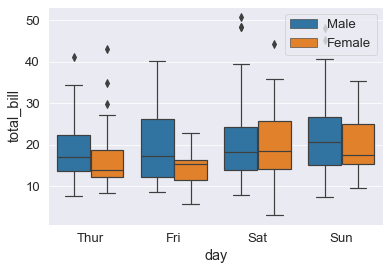

In [18]:
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex');

plt.legend(loc=1); # la legenda in alto a sx e' loc =0

## Violin Plot
Una combinazione di boxplot e kde plot, dove usa i kernel. Il nome e' ovvio...

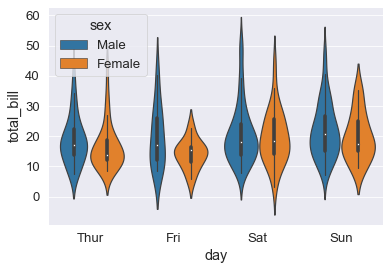

In [19]:
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex');

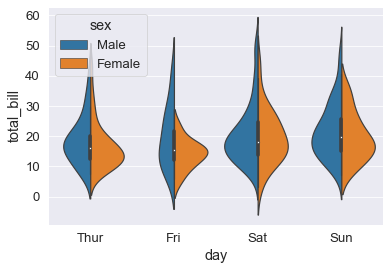

In [20]:
# E' inutile mettere tutto il violino per una sola categoria, mettiamo mezzo per una e mezzo per l'altra: split
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex',split=True);

## Strip plot
`stripplot()`

si usa quando una variabile e' categorica:

- **jitter** non mi pare che faccia una grande differenza, dovrebbe sparpagliare meglio i punti
- **hue** funziona assegna dei colori diversi in base ad una variabile categorica
- **dodge**, separa fisicamente i punti con hue differente

Prima non disegnava correttamente, perche' dove avevo scritto `fig, ax= plt.subplots(1,2, figsize=(15,5))`
avrei invece dovuto scrivere 'fig, axes=...'

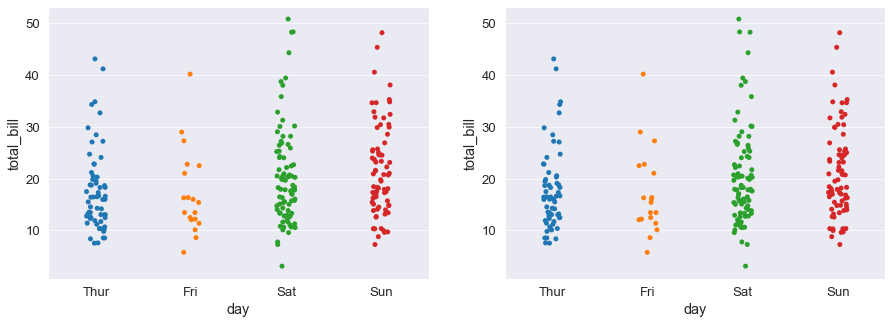

In [21]:
######  HO fatto qualche modifica rispetto al video, in modo da paragonare con e senza jitter #####

#plt.figure(figsize=(8,5))
fig, axes =plt.subplots(1,2 ,figsize=(15, 5) )        # grafici uno da parte all'altro
sns.stripplot(x='day', y='total_bill', data=tips_df, ax=axes[0]);
sns.stripplot(x='day', y='total_bill', data=tips_df, ax=axes[1], jitter=True);
#fig.show()  # non serve in un jupyter notebook

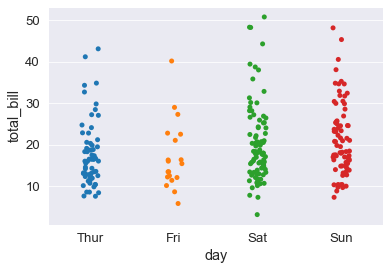

In [22]:
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True);  # jitter muove un po' in giro i punti

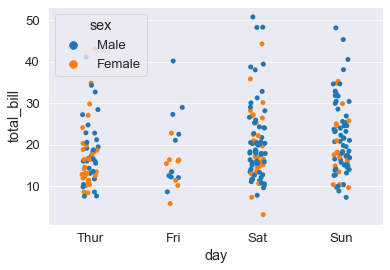

In [23]:
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex'); 

Separo le hue, ma le lascio allo stesso giorno. Questo viene ottenuto tramite il comando **dodge** separa fisicamente i due gruppi di punti.

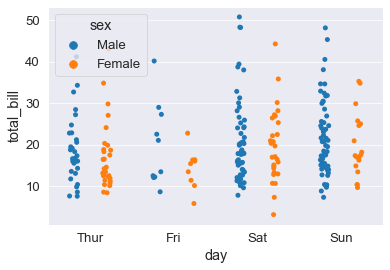

In [24]:
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True); 

## Swarm plot (lo sciame)
`violinplot()`

combina i plot precedenti.

- in pratica definisce la posizione dei punti come se fossero delle foglie, il primo al centro poi un a dx in alto , sx in alto..

Prima **riguardiamo** il violino (poi lo confrontiamo con lo swarmplot)

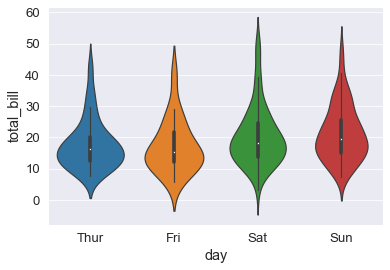

In [25]:
sns.violinplot(x='day' , y='total_bill', data=tips_df);

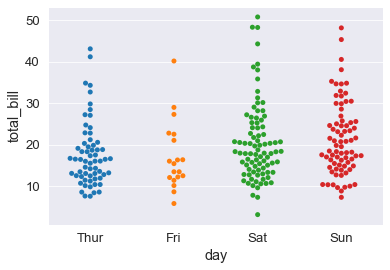

In [26]:
# poi vediamo lo sciame.
sns.swarmplot(x='day' , y='total_bill', data=tips_df);

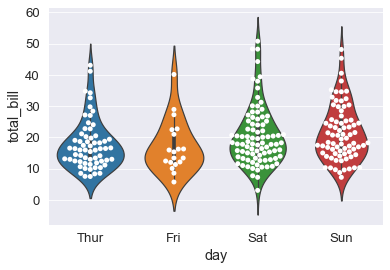

In [27]:
# metto insieme il violino e lo sciame
sns.violinplot(x='day' , y='total_bill', data=tips_df);
sns.swarmplot(x='day' , y='total_bill', data=tips_df, color='white');

# Palettes

`palette` e' un parametro

- una palette e' un insieme di colori predefiniti.
- in cui definiamo anche una topologia tra colori: ovvero quale colore e' vicino a quale colore.
- punto di partenza una palette standard
- Le palette si trovano qui: https://matplotlib.org/3.3.3/tutorials/colors/colormaps.html )

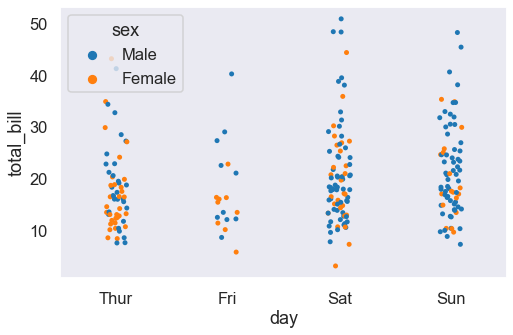

In [28]:
plt.figure(figsize=(8,5)) # funge! se non lo metto sotto diventa tutto piu' piccolo
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex');

cambio palette

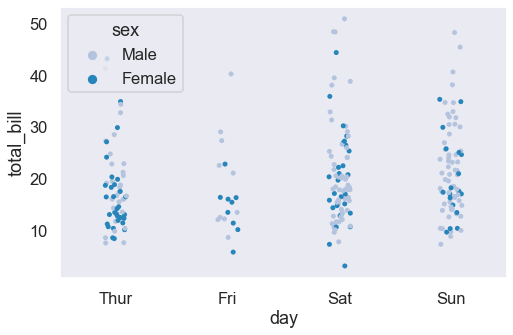

In [29]:
plt.figure(figsize=(8,5))
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='PuBu'); # PuBu=palette trovata su matplotlib

# Legend
qualche comando per muovere la legenda.
In teoria:

- loc = 0 sceglie lui la posizione ottimale
- upper right=1
- upper left =2
- lower left =3
- lower right =4

Cerca Matplotib legends e ci sono tutte le opzioni https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html


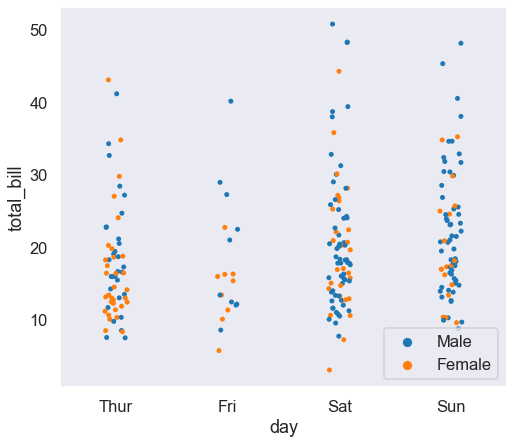

In [30]:
#plt.figure(figsize=(8,5)) # funge! se non lo metto sotto diventa tutto piu' piccolo
plt.figure(figsize=(8,7)) # funge! se non lo metto sotto diventa tutto piu' piccolo
sns.set_style('dark')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex');
#plt.legend(loc=0) # best = sceglie lui la posizione
#plt.legend(loc=1) # in alto a dx
#plt.legend(loc=2) # in alto a sx         
#plt.legend(loc=3) # in basso a sx
plt.legend(loc=4)  # in basso a dx 

# Matrix Plot

In questo caso vogliamo **visualizzare una matrice**, ovvero un oggetto con righe e colonne.
In ogni ingresso della matrice avro' dei valori e voglio visualizzarli.

<!---
Supponiamo di volere fare molti grafici contemporaneamente. Li mettiamo magari uno da parte all'altro sulla stessa riga.
Oppure possiamo metterli uno sopra l'altro. In generale si usa uno schema a matrice, dove devono esserci delle righe e delle colonne, e in ogni caselle vi e' un grafo diverso.
--->

## Heatmaps
`heatmap()`

qui sotto prendiamo il crash_df e cerchiamo di costruire delle heatmaps

argomenti utili:

- cmap = 'Blues'  e' la colormap
- annot =True   scrivi anche il valore della colorazione nella casella (altrimenti fa solo il colore)


In [31]:
crash_df.head(3);  # riguardiamo questo df

Qui sotto uso un metodo (di Pandas?) per cui

- dato un dataframe con valori numerici e categorici
- calcola la correlazione tra ogni coppia di colonne numeriche

In [32]:
crash_mx = crash_df.corr() 
crash_mx.head(3)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547


<AxesSubplot:>

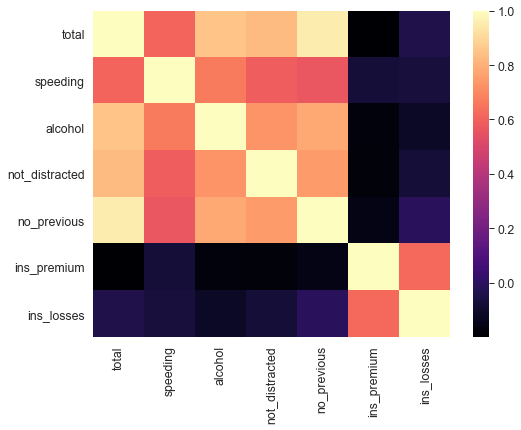

In [33]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
#sns.heatmap(crash_mx, annot=True, cmap='Blues')   # fa vedere anche i numeri nelle caselle colorate
sns.heatmap(crash_mx, annot=False, cmap='magma')   # fa vedere SOLO i colori

## Pivot Table 
questo e' un altro modo per costruire una matrice.

NEll'esempio sotto quello che fa e':
- indico l'**index** ovvero l'attributo che viene usato per l'indice di riga
- indico le **columns**, ovvero l'attributo che viene usato per l'indice di colonna
- A questo punto lui va. Controlla tutti gli i **valori**  dell'attributo per l'**index**. Li usa per costruire una tabelle di cui sono tutte le **righe**.
- Poi va e controlla i **valori** dell'attributo per le columns e costruisce le **colonne**.
- Poi va e **pesca** per ognuno degli attributi dell'index e delle columns i valori dati come **values** e li mette nelle caselle.

In [34]:
flights = sns.load_dataset('flights')
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [35]:
flights.pivot_table(index='month', columns='year', values='passengers')  # NON lavora INPLACE (invece nel video si')
flights_pt = flights.pivot_table(index='month', columns='year', values='passengers') 

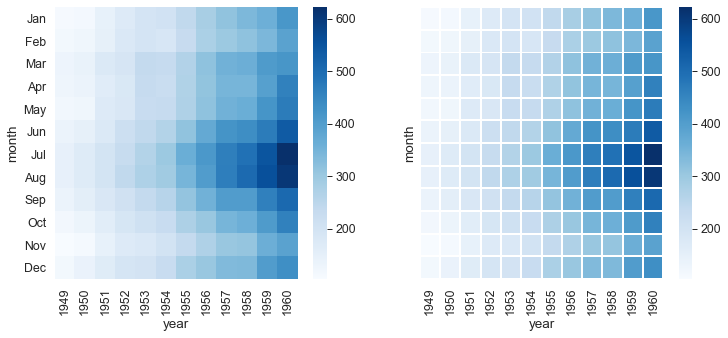

In [36]:
#sns.heatmap(flights.pivot_table(index='month', columns='year', values='passengers'), annot=False, cmap='Blues') # IDENTICO
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
sns.heatmap (flights_pt, ax=axes[0],annot=False, cmap='Blues') 
sns.heatmap (flights_pt, ax=axes[1],annot=False, cmap='Blues', linecolor='white', linewidth=1) ; #larghezza linea default 0?

## Cluster Map
`clustermap()`


hierarchically clusterd heatmap  = heatmap ottenuta cone una clusterizzazione gerarchica

- la distanza tra tutti i punti e' calcolata
- i piu' vicini sono uniti
- il lavoro continua con il prossimo vicino 
- quindi paragona le colonne e le righe

A differenza della heatmap, dove l'ordine degli attributi e' mantenuto costante, in questo caso
viene riordinato seguendo il clustering. 


In [37]:
iris = sns.load_dataset('iris') # e' un pandas dataframe di default
iris.head(3)
#sns.clustermap(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [38]:
species = iris.pop('species')  # pop spara fuori una colonna e la trasforma in una Series

## Heatmap ottenuta con una clusterizzazione gerarchica

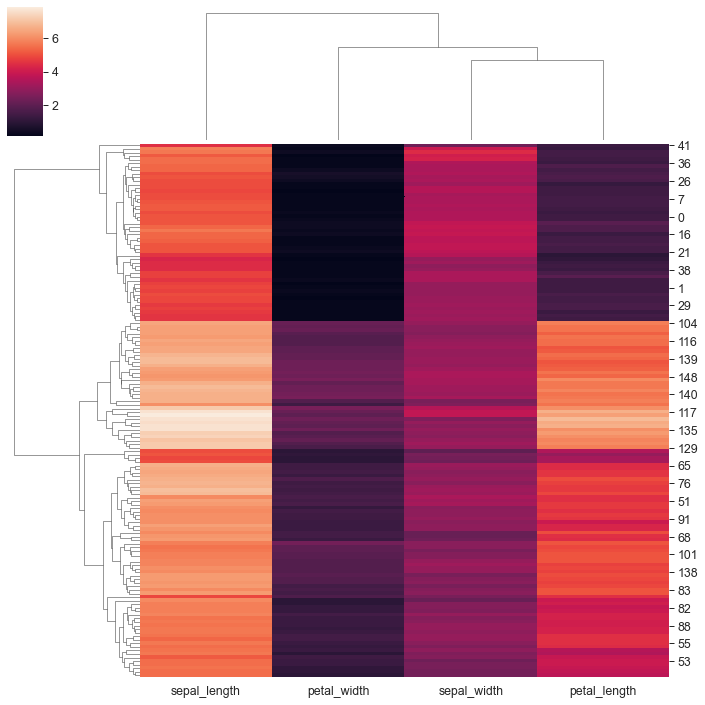

In [39]:
sns.clustermap(iris);  # heatmap ottenuta con una clusterizzazione gerarchica

Ricorda che la pivot table ho dovuto rinominarla, per lui fights e' la pivot table, per me e' flights_pt

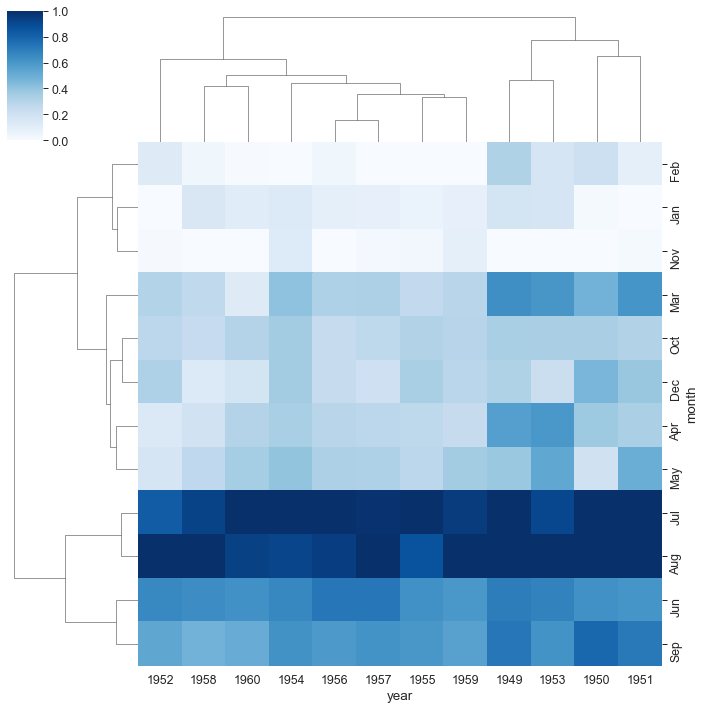

In [40]:
#sns.clustermap(flights , cmap ='Blues', standard_scale =1)  # NON FUNGE normalizza i dati per focalizzarci sul clustering 
sns.clustermap(flights_pt , cmap ='Blues', standard_scale =1);  # normalizza i dati per focalizzarci sul clustering 

un commento a quanto qui sopra. Pensale in termine di sequenze numeriche, in cui il colore e' un numero.
Puoi avere sequenze **verticali** e **orizzontali**.
Prendiamo ora le sequenze orizzontali.
Le due piu' in alto sono molto chiare, ma non sono le piu' vicine, infatti Nov e Jan sono connesse. Poi si connette Feb.
Non mi e' chiaro il dendrogramma come venga poi costruito. Mi pare di capire che alla fine ci possano essere solo delle coppie. Se il primo vicino di una sequenza e' gia' in una coppia, questa rimane isolata e va attaccata alla coppia oppure... devo pensare all'algoritmo.

Nota che a causa del clustering mi aspetto di vedere striscie. Questo perche' sequenze simili vanno messe vicine tra loro.

Potrebbero mettere un puntino al centro di ogni cella. Questo punto si puo' muovere sull'asse delle z o delle y .Il modvimento e' lo stesso sui due assi e in questo modo si vedono le sequenze sia guardando le righe che le colonne!

## Pair Grids
`PairGrid()`

Prima abbiamo visto i pairplots, dove si facevano degli scatter plot tra tutte le coppie di colonne del DataFrame.

Per prima cosa creiamo una grid vuota.

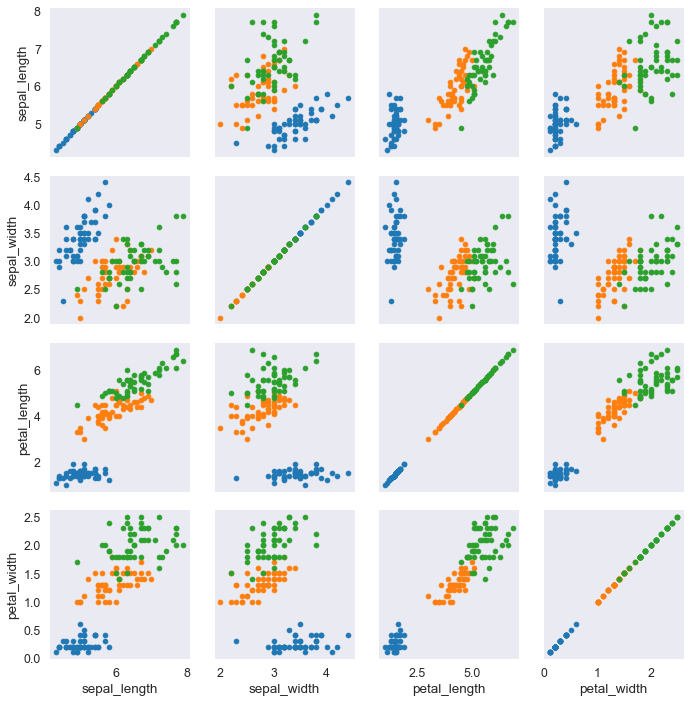

In [41]:
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')  # assegna un colore diverso alle varie specie
iris_g.map(plt.scatter);                     # questo mi pare un comando di matplotlib o PANDAS

Ora vogliamo mettere un istogramma lungo la diagonale (della griglia di grafici).

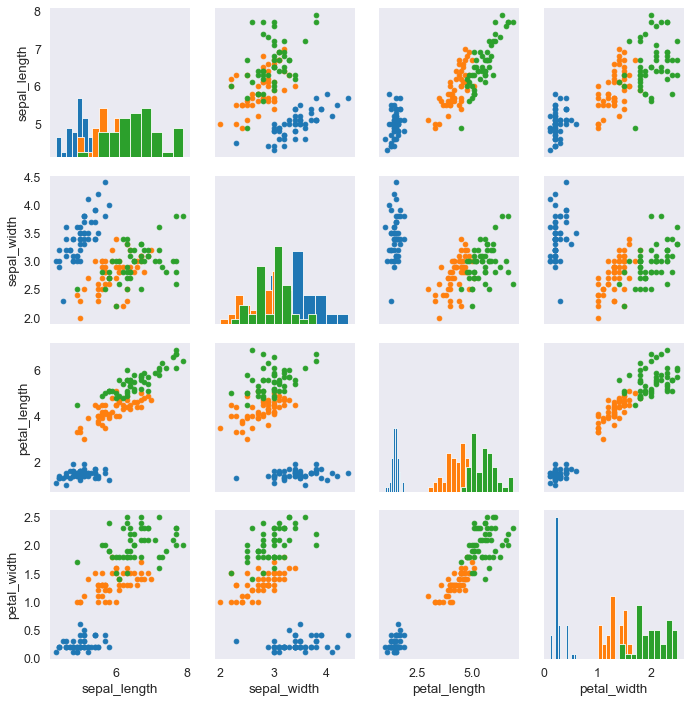

In [42]:
iris_g = sns.PairGrid(iris, hue='species')  # assegna un colore diverso alle varie specie
#iris_g.map(plt.scatter);                    # questo mi pare un comando di matplotlib o PANDAS
iris_g.map_diag(plt.hist);                  # nei grafi diagonali inserisce un istogramma
iris_g.map_offdiag(plt.scatter);            # non mette gli scatterplot diagonali! (occhio che devi commentare l'altro!) 

Ora vogliamo mettere delle altre cose nella:
- parte **superiore** (della matrice di grafici) 
- parte **inferiore** (della matrice di grafici)

quindi diamo un comando chen indica cosa mettere sulla diagonale e poi uno per la triangolare superiore e uno per la triangoplar e superiore. Occhio che si deve passare come argomento di 

**map_diag**  (oppure map_lower o map_upper) il nome della funzione che si userebbe per diegnare un singolo plot di questo tipo.

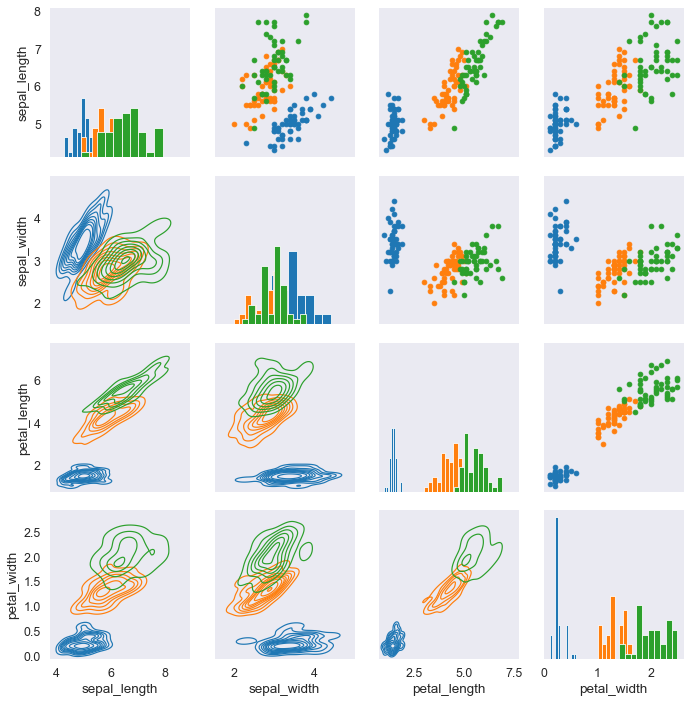

In [43]:
iris_g = sns.PairGrid(iris, hue='species')  # assegna un colore diverso alle varie specie
iris_g.map_diag(plt.hist);                  # nei grafi diagonali inserisce un istogramma
iris_g.map_upper(plt.scatter);              # sopre metti gli scatter plot 
iris_g.map_lower(sns.kdeplot);              # sotto metti KDE quindi devi usare la funzione di SEABORN

### Variabili per la nostra custom grid

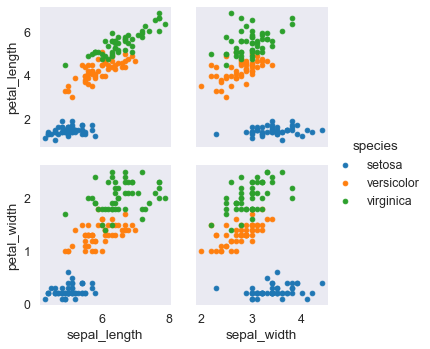

In [44]:
#iris_g = sns.PairGrid(iris, hue='species')  # assegna un colore diverso alle varie specie
iris_g = sns.PairGrid(iris, hue='species', 
                       x_vars=["sepal_length", "sepal_width"],
                      y_vars= ["petal_length", "petal_width"] )
iris_g.map(plt.scatter);                                         # map e' usata in modo molto potente
iris_g.add_legend();

## Facet Grid
`FacetGrid()`

E' una specie di subplots di matplotlib ma con delle cose predefinite.

- posso disegnare plot multipli in una griglia (grid) 
- posso definire le colonne e righe

Si crea un sistema a forma di **griglia** (in cui pero' non abbiamo ancora messo nulla).
Al primo passo indico le colonne e le righe, per esempio:

- nelle colonne metto il tempo (time). Che puo' assumere 2 valori: Dinner e Lunch 
- nelle righe metto 'smoker'. Che puo' assumere 2 valori: yes e no

Quindi la griglia che ho creato e' 2x2.

In ogni ingresso della griglia  devo mettere un grafico.
Cosa metto?

## Map
Il metodo `map()` di python e' utilissimo perche' posso passare anche delle funzioni!

Mappo ogni grafo con il metodo map() e faccio un istogramma 
della quantita' 'total_bill'.

Queste quantita' saranno **limitata** al valore di 'time' e 'smoker'
corrispondente alla griglia! 

Quindi per esempio in alto a sx:
- smoker = yes
- time = lunch

Faccio l'istogramma di tutti i 'total_bill' che si riferiscono a smoker e lunch.

Ricapitolando con FacetGrid definisco una griglia associata a due colonne,
che formeranno le righe e le colonne della griglia. Per ogni valore di ciascuna
delle due colonne faccio un grafico riferito, ad una **terza colonna**

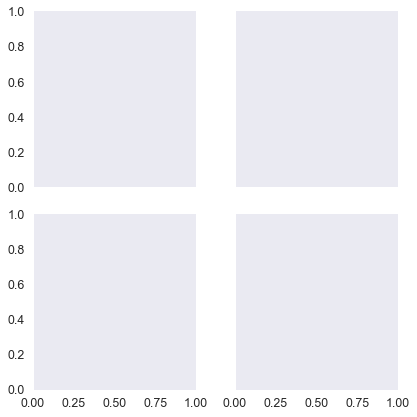

In [45]:
tips_fg= sns.FacetGrid(tips_df, col='time', row='smoker')  # qui resta vuota.

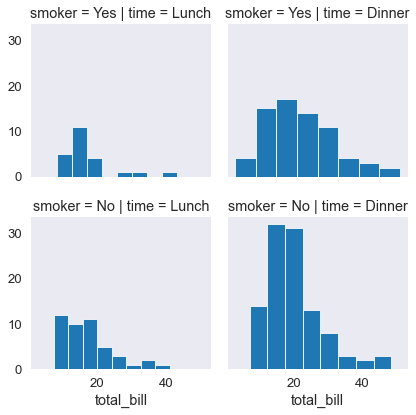

In [46]:
sns.set_context('paper', font_scale=1.5)
tips_fg= sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.hist, 'total_bill', bins=8 );                 # mappa la funzione plt.hist, sulla quantita 'total_bill' 

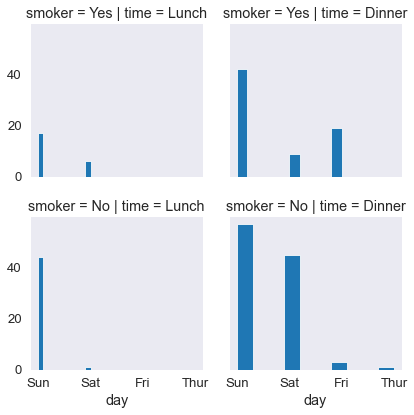

In [47]:
tips_fg= sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.hist, 'day' )   

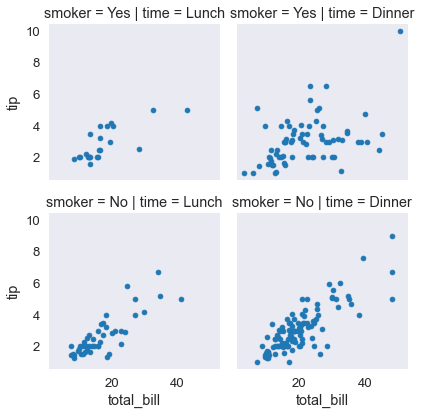

In [48]:
tips_fg= sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.scatter, 'total_bill', 'tip');

Nel caso sotto invece, facciamo una griglia che contiene solo colonne.
Non ci sono righe, pero' adesso usiamo il comando hue che ci permette di usare un colore diverso
in base all'argomento usato. In questo caso uso come hue='smoker'

Aggiungo un prametro, col_order che mi consente di ordinare le colonne. Basta mettere una lista contenente 
il nome delle colonne volute e l'ordine di quella lista sara' seguito dal plot.

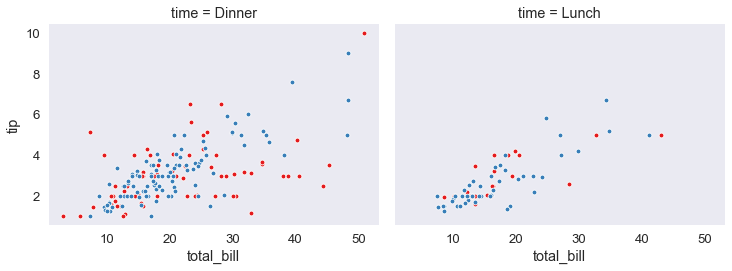

In [49]:
tips_fg= sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3, col_order=['Dinner','Lunch']
                      , palette='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor ='w');

## Gli stili, le linee etc

- creo quindi un dizionario, in cui ci sono i parametri, lo chiamo **kws**
 costruisco una Griglia faccettata (FacedGrid), in cui:
- le colonne sono i valori di 'sex'
- punti che corrispondono a fumatori e non fumatori sono in colori diversi hue='smoker'
- altezza = 4  height=4
- aspect = 1.3  (non ricordo cosa faccia)

a questo punto mappo la funzione plt.scatter sulla griglia faccettata, tramite **map**.
Alla funzione map passo 3 parametri:
- le x che sono 'total_bill'
- le y che e' 'tip'
- kws    **sintassi strana** devo mettere due asterischi *, davanti al dizionario quando lo passo!

Ho trovato che non gli piace il fatto che definisca le colonne della FacetGrid tramite 
la variabile 'sex', forse perche' e' categorica? se metto time funge.
Ho trovato l'errore. 

Io non penso in modo "case sensitive", nell'esempio si mette `hue_order=['yes', 'No']`, io
invece avevo preso tutto in minuscolo. Per questo non scriveva nulla: non c'era 
corrispondenza tra:
- i valori dello hue: Yes,No
- i valori dello hue_order: yes, no

**Attento** devi controllare che negli argomenti ci sia perfetta corrispondenza tra i nomi!

**Domanda** cosa fanno i doppi asterischi davanti al dizinoario? 
**Risposta** fa un-packing dell'oggetto.

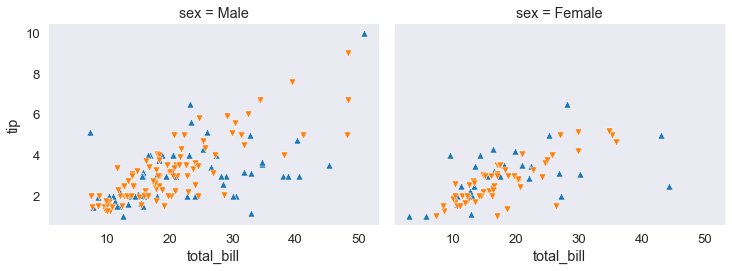

In [50]:

kws = dict(s=50, linewidth=0.5, edgecolor ='w')  # ho creato un dizionario con 3 ingressi

tips_fg = sns.FacetGrid(tips_df, col ='sex', hue='smoker', height=4, aspect=1.3, 
                        hue_order=['Yes', 'No'], 
                        hue_kws=dict(marker=['^','v']))   # triangolini in su e triangolini in giu'

tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws);     # nota sintattica, qui gli passo **

## Altro dataset: attention

Ho degli studenti, ne voglio mettere 5 per linea.
Per fare questo indico solo quale sia la variabile che uso per le colonne
Poi tramite col_warps=5 indico che devono esserci solo 5 colonne al max, poi
 va a capo lui automaticamente


- numero di colonne per linea `col_wrap=5`
- se non uso `col_wrap=5` lui mette ogni valore di subject in una colonna diversa, ce ne sono 20...



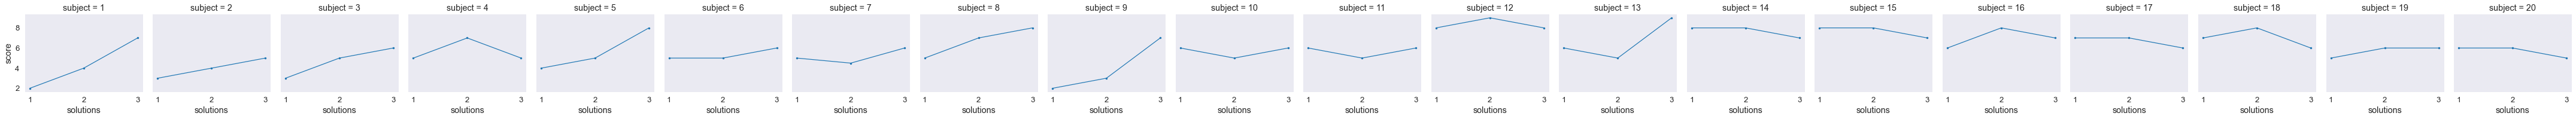

In [51]:
att_df = sns.load_dataset('attention')
att_fg  = sns.FacetGrid(att_df, col='subject')
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

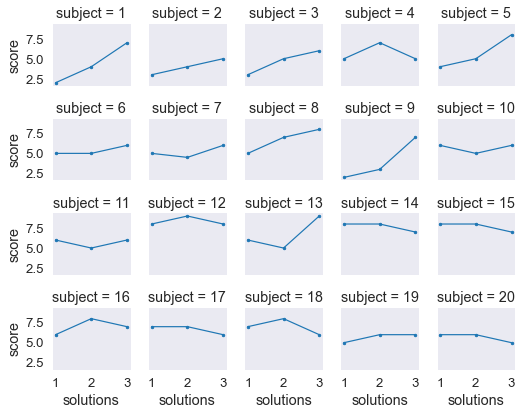

In [52]:
att_fg  = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

In [53]:
att_df.head(3)

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0


# Regression Plots
Uso tip data, faccio uno scatter plot con interpolazione. 


`lmplot()`  (linear regression?)

Faccio due interpolazioni diverse per ognuno delle differenti **hue**



<Figure size 576x432 with 0 Axes>

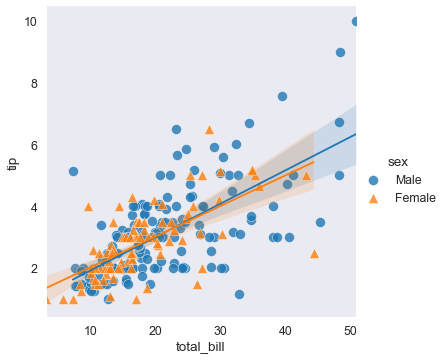

In [54]:
plt.figure(figsize= (8,6))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data = tips_df, markers=['o', '^'], 
          scatter_kws={'s':100, 'linewidth':0.5, 'edgecolor':'w'});
# regression plot

Qui sotto usa i comandi **col** e **row** per costruire una sorta di FacetGrid automatica, 
tramite la funzione lmlpot (che fa la regressione). 

Anche in questo caso  viene costruita una griglia.

Questa griglia seleziona i punti e poi per i punti che hanno le caratteristiche 
che combaciano con quelle della griglia si fa il regression plot

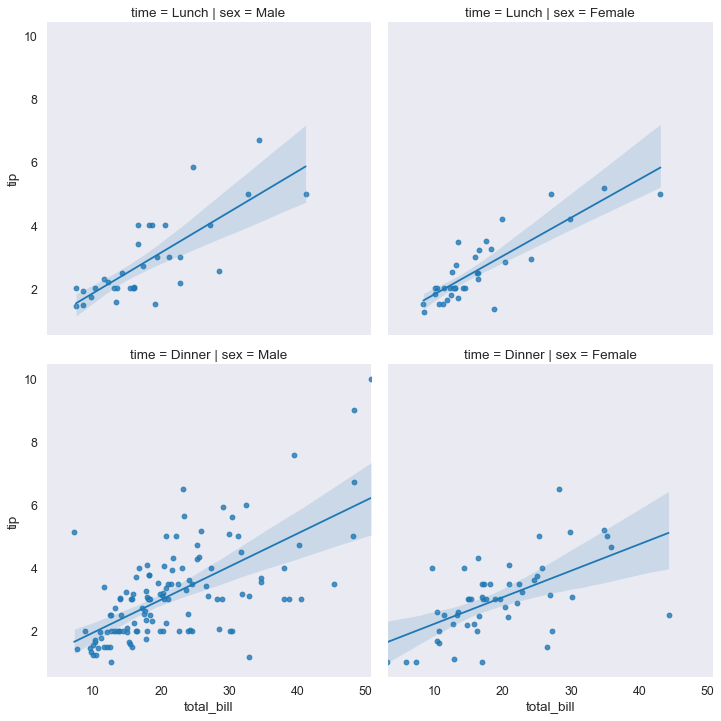

In [55]:
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df);

# Salvare le figure
Per salvare i file si usano semplicemente le funzioni di Matplotlib.
In praticolare si deve:
- chiamare una funzione che faccia un'immagine
- subito dopo chiamare `plt.savefig('nomeImmagine.eps')`  
- cambiando l'estensione si ottengono file diversi, per esempio `png, pdf,...`

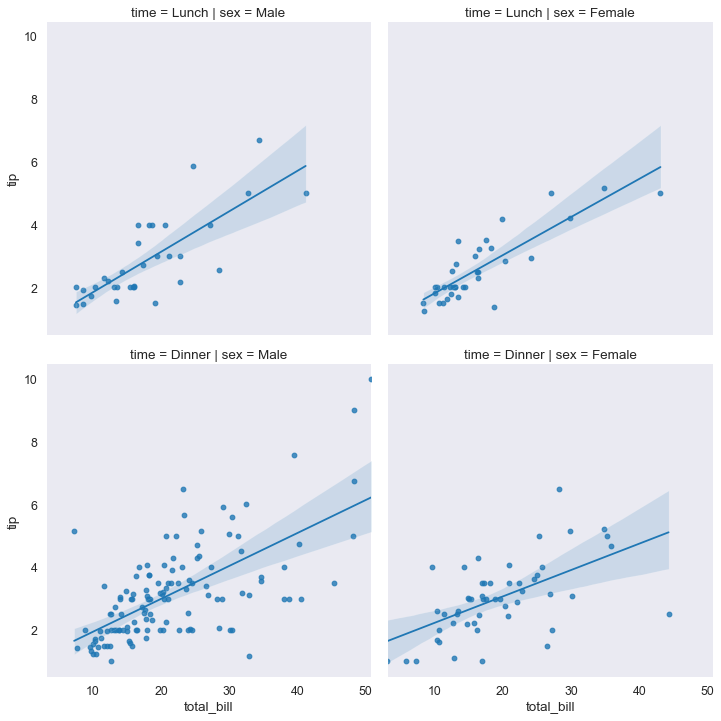

In [56]:
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df);
plt.savefig('prova.pdf')

# Subplots (Matplotlib)
questo e' piu' correlato con matplotlib, comunque e' utile anche in questo notebook.

Text(0.5, 1.0, 'Squirtle')

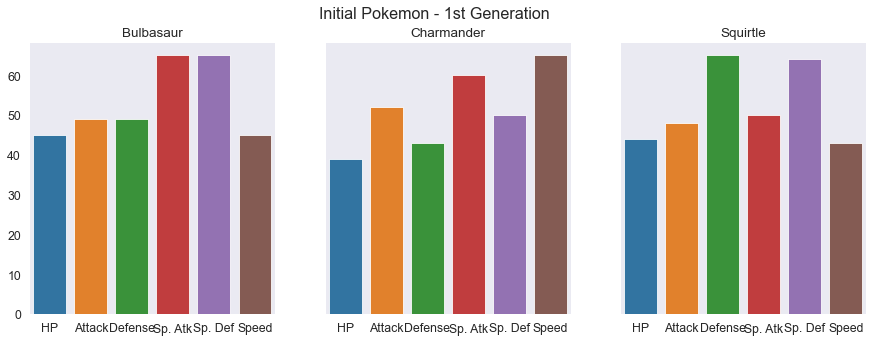

In [59]:
#import pandas as pd
#import seaborn as sns
#from matplotlib import pyplot as plt
pokemon = pd.read_csv('pokemon.csv')
#p_df.head()

# bulbasaur = pokemon[['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']][pokemon.loc[:, 'Name'] == 'Bulbasaur']
poke_num = pokemon[['Name', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].set_index('Name')

bulbasaur = poke_num.loc['Bulbasaur']
charmander = poke_num.loc['Charmander']
squirtle = poke_num.loc['Squirtle']


fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')

# Bulbasaur
sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
axes[0].set_title(bulbasaur.name)

# Charmander
sns.barplot(ax=axes[1], x=charmander.index, y=charmander.values)
axes[1].set_title(charmander.name)

# Squirtle
sns.barplot(ax=axes[2], x=squirtle.index, y=squirtle.values)
axes[2].set_title(squirtle.name)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

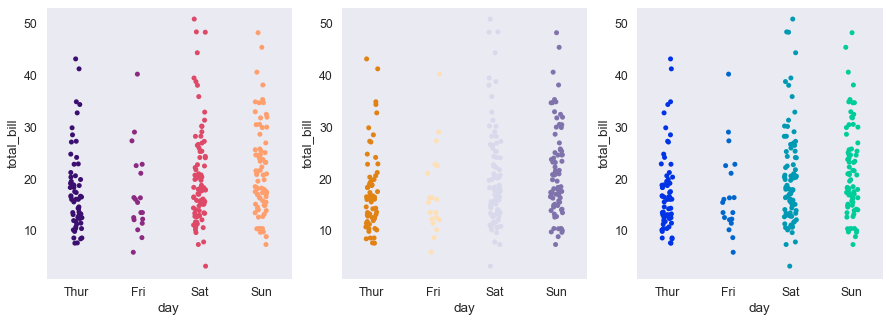

In [60]:
tips_df = sns.load_dataset('tips')

#fig, axes =plt.subplots(1,3, figsize=(15,5), sharey=True)
fig, axes =plt.subplots(1,3, figsize=(15,5))
sns.stripplot( ax=axes[0] ,x='day', y='total_bill', data=tips_df, palette='magma')                # FUNGE 
sns.stripplot( ax=axes[1], x='day', y='total_bill', data=tips_df, jitter=True, palette='PuOr')    # FUNGE 
sns.stripplot( ax=axes[2], x='day', y='total_bill', data=tips_df, jitter=True, palette='winter')  # FUNGE

#sns.stripplot( x='day', y='total_bill', data=tips_df)                # NON FUNGE 
#sns.stripplot( x='day', y='total_bill', data=tips_df, jitter=True)   # NON FUNGE 
#sns.stripplot( x='day', y='total_bill', data=tips_df, jitter=True)   # NON FUNGE